In [1]:
import os
import glob
import cv2
import numpy as np

from  scipy import ndimage

from skimage.io import imread, imshow
from skimage import *



In [2]:
pwd

'C:\\Users\\ST-USER\\jaewon\\DVT_detection\\code'

In [10]:
img_path='C:\\Users\\ST-USER\\jaewon\\DVT_detection\\data/img_default'
imgfol_list=sorted(glob.glob(img_path+'/*'))
for imfl in range(len(imgfol_list)):
    imgfile_list=sorted(glob.glob(imgfol_list[imfl]+'/*.png'))
    print(imgfile_list, len(imgfile_list))

print(imgfol_list[0], len(imgfol_list))


['C:\\Users\\ST-USER\\jaewon\\DVT_detection\\data/img_default\\01013843\\01013843_0068.png', 'C:\\Users\\ST-USER\\jaewon\\DVT_detection\\data/img_default\\01013843\\01013843_0069.png', 'C:\\Users\\ST-USER\\jaewon\\DVT_detection\\data/img_default\\01013843\\01013843_0071.png', 'C:\\Users\\ST-USER\\jaewon\\DVT_detection\\data/img_default\\01013843\\01013843_0072.png', 'C:\\Users\\ST-USER\\jaewon\\DVT_detection\\data/img_default\\01013843\\01013843_0073.png', 'C:\\Users\\ST-USER\\jaewon\\DVT_detection\\data/img_default\\01013843\\01013843_0074.png', 'C:\\Users\\ST-USER\\jaewon\\DVT_detection\\data/img_default\\01013843\\01013843_0075.png', 'C:\\Users\\ST-USER\\jaewon\\DVT_detection\\data/img_default\\01013843\\01013843_0076.png', 'C:\\Users\\ST-USER\\jaewon\\DVT_detection\\data/img_default\\01013843\\01013843_0077.png', 'C:\\Users\\ST-USER\\jaewon\\DVT_detection\\data/img_default\\01013843\\01013843_0078.png', 'C:\\Users\\ST-USER\\jaewon\\DVT_detection\\data/img_default\\01013843\\0101384

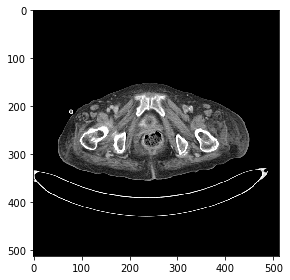

In [13]:
t_imgpath='C:\\Users\\ST-USER\\jaewon\\DVT_detection\\data/img_default/01013843/01013843_0068.png'
t_img= imread(t_imgpath, as_gray=True)

imshow(t_img)

In [21]:
print(t_img)
print(t_img.shape)
print(t_img[200][300])
# print(t_img.min(), t_img.max())
print(len(t_img))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(512, 512)
86
512


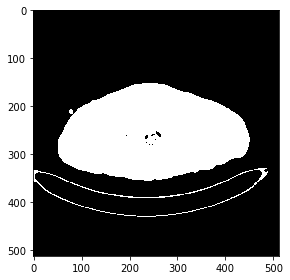

In [40]:
# t=0
# top=[]
for tiy in range(len(t_img)):
    for tix in range(len(t_img)):
        if t_img[tix][tiy]>0:
            t_img[tix][tiy]=255
        else:
            t_img[tix][tiy]=0
            
imshow(t_img)

In [47]:
help(ndimage.binary_fill_holes)

Help on function binary_fill_holes in module scipy.ndimage.morphology:

binary_fill_holes(input, structure=None, output=None, origin=0)
    Fill the holes in binary objects.
    
    
    Parameters
    ----------
    input : array_like
        N-D binary array with holes to be filled
    structure : array_like, optional
        Structuring element used in the computation; large-size elements
        make computations faster but may miss holes separated from the
        background by thin regions. The default element (with a square
        connectivity equal to one) yields the intuitive result where all
        holes in the input have been filled.
    output : ndarray, optional
        Array of the same shape as input, into which the output is placed.
        By default, a new array is created.
    origin : int, tuple of ints, optional
        Position of the structuring element.
    
    Returns
    -------
    out : ndarray
        Transformation of the initial image `input` where ho

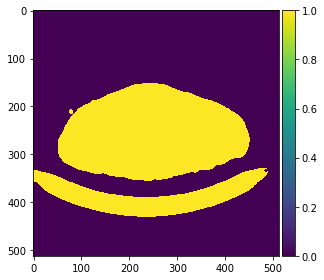

In [48]:
hole=ndimage.binary_fill_holes(t_img).astype(int)
imshow(hole) 

In [49]:
hole.type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [65]:
####################
io.imsave('./newtest/t_img.jpg', hole)

C:\Users\ST-USER\anaconda3\envs\zzaem\lib\site-packages\ipykernel_launcher.py:1: UserWarning: ./newtest/t_img.jpg is a low contrast image
  """Entry point for launching an IPython kernel.
Lossy conversion from int32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [4]:
##############
path='./newtest/t_img.jpg'

In [27]:
           
#             top.append([tix,tiy])
#             ctop=tix, tiy
#             print('ctop:',ctop)
#             t=1
#         if t==1:    
#             break
            
#     if t==1:
#         break

In [2]:
import matplotlib.pyplot as plt

In [68]:
src = cv2.imread(path, cv2.IMREAD_COLOR)
filled=src.copy()
gray = cv2.cvtColor(filled, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(filled, 127, 255, cv2.THRESH_BINARY)
binary = cv2.bitwise_not(filled)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
    cv2.drawContours(filled, [contours[i]], 0, (0, 0, 255), 2)
    cv2.putText(filled, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
#     print(i, hierarchy[0][i])
#     cv2.imshow("src", src)
#     cv2.waitKey(0)
#     plt.imshow('src', cmap='gray')

# cv2.destroyAllWindows()
# imshow(filled)
plt.imshow(filled, cmap='gray')
    
        

error: OpenCV(4.4.0) ..\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [8]:
# for f in range(len(filename)):

# file = filename[f]
###############################################
img = cv2.imread(path)

gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray1)
img1 = img.copy()

ret, thresh = cv2.threshold(gray1,127,255,0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# contours_image = cv2.drawContours(img1, contours, -1, (255,0,0),2)



nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(gray1)

int_cent = centroids.astype(np.int32)

In [31]:
print(contours[0])

[[[472 335]]

 [[471 336]]

 [[470 336]]

 [[469 337]]

 [[464 337]]

 [[463 338]]

 [[460 338]]

 [[459 339]]

 [[456 339]]

 [[455 340]]

 [[452 340]]

 [[451 341]]

 [[449 341]]

 [[448 342]]

 [[445 342]]

 [[444 343]]

 [[442 343]]

 [[441 344]]

 [[439 344]]

 [[438 345]]

 [[437 345]]

 [[436 346]]

 [[434 346]]

 [[433 347]]

 [[432 347]]

 [[431 348]]

 [[429 348]]

 [[428 349]]

 [[427 349]]

 [[426 350]]

 [[425 350]]

 [[424 351]]

 [[423 351]]

 [[422 352]]

 [[421 352]]

 [[420 353]]

 [[419 353]]

 [[418 354]]

 [[417 354]]

 [[416 355]]

 [[415 355]]

 [[414 356]]

 [[413 356]]

 [[412 357]]

 [[411 357]]

 [[410 358]]

 [[408 358]]

 [[407 359]]

 [[406 359]]

 [[405 360]]

 [[404 360]]

 [[403 361]]

 [[402 361]]

 [[401 362]]

 [[399 362]]

 [[398 363]]

 [[397 363]]

 [[396 364]]

 [[395 364]]

 [[394 365]]

 [[392 365]]

 [[391 366]]

 [[390 366]]

 [[389 367]]

 [[387 367]]

 [[386 368]]

 [[385 368]]

 [[384 369]]

 [[382 369]]

 [[381 370]]

 [[380 370]]

 [[379

In [16]:
help(cv2.drawContours)

Help on built-in function drawContours:

drawContours(...)
    drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) -> image
    .   @brief Draws contours outlines or filled contours.
    .   
    .   The function draws contour outlines in the image if \f$\texttt{thickness} \ge 0\f$ or fills the area
    .   bounded by the contours if \f$\texttt{thickness}<0\f$ . The example below shows how to retrieve
    .   connected components from the binary image and label them: :
    .   @include snippets/imgproc_drawContours.cpp
    .   
    .   @param image Destination image.
    .   @param contours All the input contours. Each contour is stored as a point vector.
    .   @param contourIdx Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
    .   @param color Color of the contours.
    .   @param thickness Thickness of lines the contours are drawn with. If it is negative (for example,
    .   thickness

In [22]:
print(nlabels)

75


In [83]:
print(len(contours))
print(contours)

3
[array([[[472, 335]],

       [[471, 336]],

       [[470, 336]],

       [[469, 337]],

       [[464, 337]],

       [[463, 338]],

       [[460, 338]],

       [[459, 339]],

       [[456, 339]],

       [[455, 340]],

       [[452, 340]],

       [[451, 341]],

       [[449, 341]],

       [[448, 342]],

       [[445, 342]],

       [[444, 343]],

       [[442, 343]],

       [[441, 344]],

       [[439, 344]],

       [[438, 345]],

       [[437, 345]],

       [[436, 346]],

       [[434, 346]],

       [[433, 347]],

       [[432, 347]],

       [[431, 348]],

       [[429, 348]],

       [[428, 349]],

       [[427, 349]],

       [[426, 350]],

       [[425, 350]],

       [[424, 351]],

       [[423, 351]],

       [[422, 352]],

       [[421, 352]],

       [[420, 353]],

       [[419, 353]],

       [[418, 354]],

       [[417, 354]],

       [[416, 355]],

       [[415, 355]],

       [[414, 356]],

       [[413, 356]],

       [[412, 357]],

       [[411, 357]],

       

In [84]:
leg=[[contours[body]]]
print(len(leg))
print(leg)

1
[[array([[[234, 155]],

       [[233, 156]],

       [[228, 156]],

       [[227, 157]],

       [[223, 157]],

       [[222, 158]],

       [[219, 158]],

       [[218, 159]],

       [[213, 159]],

       [[212, 160]],

       [[210, 160]],

       [[209, 161]],

       [[206, 161]],

       [[205, 162]],

       [[204, 162]],

       [[203, 163]],

       [[201, 163]],

       [[200, 164]],

       [[198, 164]],

       [[197, 165]],

       [[196, 165]],

       [[195, 166]],

       [[193, 166]],

       [[192, 167]],

       [[191, 167]],

       [[190, 168]],

       [[188, 168]],

       [[187, 169]],

       [[186, 169]],

       [[185, 170]],

       [[183, 170]],

       [[182, 171]],

       [[180, 171]],

       [[179, 172]],

       [[177, 172]],

       [[176, 173]],

       [[174, 173]],

       [[173, 174]],

       [[171, 174]],

       [[170, 175]],

       [[168, 175]],

       [[167, 176]],

       [[165, 176]],

       [[164, 177]],

       [[163, 177]],

      

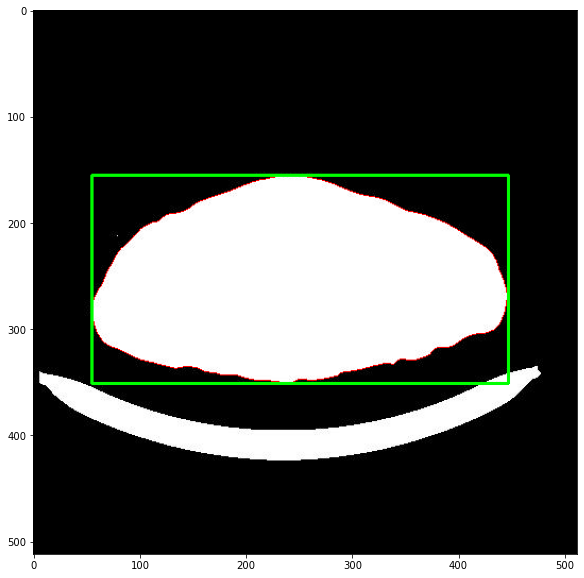

In [87]:
img2=img.copy()
areas=[]
conloc=[]
# for cal in range(len(labels)):
for cnt in range(len(contours)):    
    area=cv2.contourArea(contours[cnt])
    areas.append(area)
    conloc.append(contours[cnt])
body=areas.index(max(areas))

cv2.drawContours(img2, [contours[body]], 0,(255,0,0), 1)

leg=[[contours[body]]]

# for cnt in contours:

x, y, w, h = cv2.boundingRect(contours[body])
cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plt.figure(figsize=(10,10))    
plt.imshow(img2, cmap='gray')

In [89]:
print(x, y, x+w, y+h)

55 155 447 351


In [ ]:
print(max(contours[0][body]))
print(min(contours[0][body]))

In [71]:
print(len(contours))
print(len(contours[body]))
print(max(contours[body][0]))
print(contours[body][1])
print(contours[body])

3
480
[234 155]
[[233 156]]
[[[234 155]]

 [[233 156]]

 [[228 156]]

 [[227 157]]

 [[223 157]]

 [[222 158]]

 [[219 158]]

 [[218 159]]

 [[213 159]]

 [[212 160]]

 [[210 160]]

 [[209 161]]

 [[206 161]]

 [[205 162]]

 [[204 162]]

 [[203 163]]

 [[201 163]]

 [[200 164]]

 [[198 164]]

 [[197 165]]

 [[196 165]]

 [[195 166]]

 [[193 166]]

 [[192 167]]

 [[191 167]]

 [[190 168]]

 [[188 168]]

 [[187 169]]

 [[186 169]]

 [[185 170]]

 [[183 170]]

 [[182 171]]

 [[180 171]]

 [[179 172]]

 [[177 172]]

 [[176 173]]

 [[174 173]]

 [[173 174]]

 [[171 174]]

 [[170 175]]

 [[168 175]]

 [[167 176]]

 [[165 176]]

 [[164 177]]

 [[163 177]]

 [[162 178]]

 [[160 178]]

 [[159 179]]

 [[157 179]]

 [[156 180]]

 [[155 180]]

 [[154 181]]

 [[153 181]]

 [[151 183]]

 [[150 183]]

 [[147 186]]

 [[146 186]]

 [[145 187]]

 [[144 187]]

 [[143 188]]

 [[142 188]]

 [[141 189]]

 [[139 189]]

 [[138 190]]

 [[135 190]]

 [[134 191]]

 [[128 191]]

 [[127 192]]

 [[125 192]]

 [[123

In [39]:
print(conloc)

[array([[[472, 335]],

       [[471, 336]],

       [[470, 336]],

       [[469, 337]],

       [[464, 337]],

       [[463, 338]],

       [[460, 338]],

       [[459, 339]],

       [[456, 339]],

       [[455, 340]],

       [[452, 340]],

       [[451, 341]],

       [[449, 341]],

       [[448, 342]],

       [[445, 342]],

       [[444, 343]],

       [[442, 343]],

       [[441, 344]],

       [[439, 344]],

       [[438, 345]],

       [[437, 345]],

       [[436, 346]],

       [[434, 346]],

       [[433, 347]],

       [[432, 347]],

       [[431, 348]],

       [[429, 348]],

       [[428, 349]],

       [[427, 349]],

       [[426, 350]],

       [[425, 350]],

       [[424, 351]],

       [[423, 351]],

       [[422, 352]],

       [[421, 352]],

       [[420, 353]],

       [[419, 353]],

       [[418, 354]],

       [[417, 354]],

       [[416, 355]],

       [[415, 355]],

       [[414, 356]],

       [[413, 356]],

       [[412, 357]],

       [[411, 357]],

       [[

In [41]:
###################
print(max(conloc))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

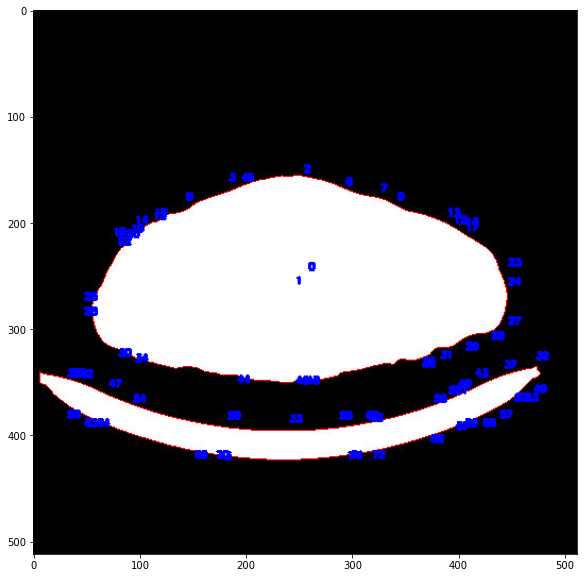

In [35]:
for cnt in range(len(contours)):
    cv2.drawContours(img1, [contours[cnt]], 0,(255,0,0), 1)
for i in range(nlabels):
    cv2.putText(img1, str(i), (int_cent[i][0], int_cent[i][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 2)

plt.figure(figsize=(10,10))    
plt.imshow(img1, cmap='gray')

In [60]:
print(contours)

[array([[[475, 335]],

       [[475, 336]],

       [[475, 337]],

       ...,

       [[472, 334]],

       [[473, 334]],

       [[474, 334]]], dtype=int32), array([[[472, 335]],

       [[471, 336]],

       [[470, 336]],

       ...,

       [[474, 336]],

       [[474, 335]],

       [[473, 335]]], dtype=int32), array([[[ 80, 212]],

       [[ 79, 213]],

       [[ 78, 212]],

       [[ 79, 211]]], dtype=int32), array([[[ 79, 212]]], dtype=int32), array([[[235, 155]],

       [[236, 155]],

       [[237, 155]],

       ...,

       [[232, 155]],

       [[233, 155]],

       [[234, 154]]], dtype=int32), array([[[234, 155]],

       [[233, 156]],

       [[232, 156]],

       ...,

       [[237, 156]],

       [[236, 156]],

       [[235, 156]]], dtype=int32)]


In [52]:
print(binary.shape)

(512, 512)


In [90]:
pwd

'C:\\Users\\ST-USER\\jaewon\\DVT_detection\\code'

In [92]:
path='C:\\Users\\ST-USER\\jaewon\\DVT_detection\\data/img_default'

fol_list=sorted(glob.glob(path+'/*'))
fol_name=sorted(os.listdir(path))

print(fol_list[0])

C:\Users\ST-USER\jaewon\DVT_detection\data/img_default\01013843


C:\Users\ST-USER\anaconda3\envs\zzaem\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


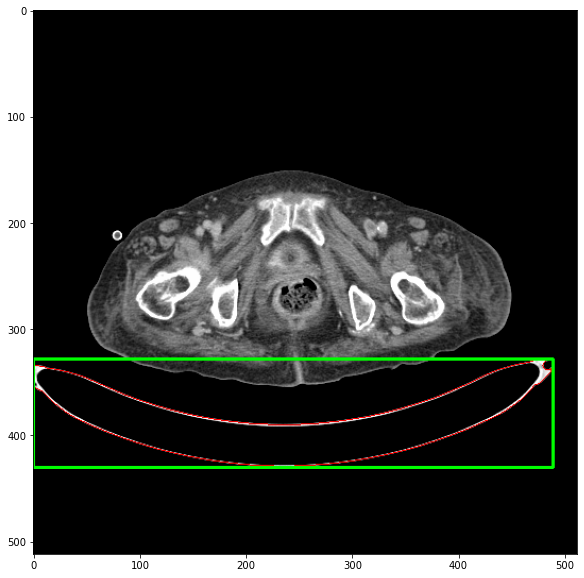

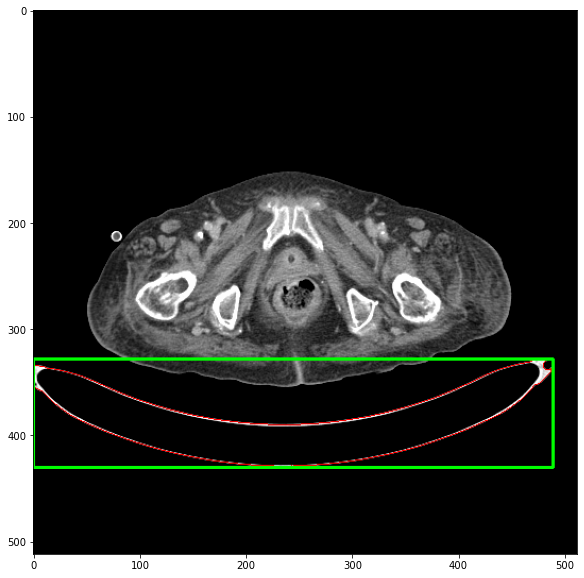

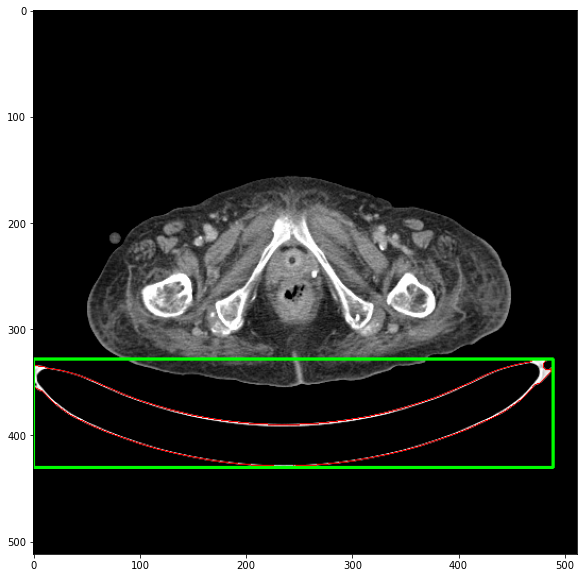

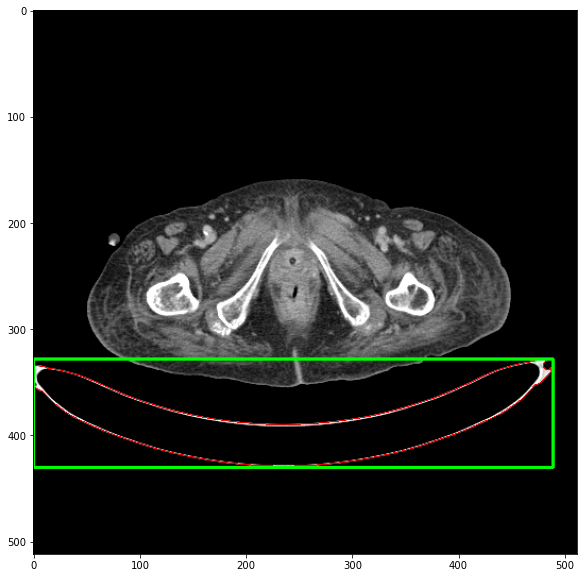

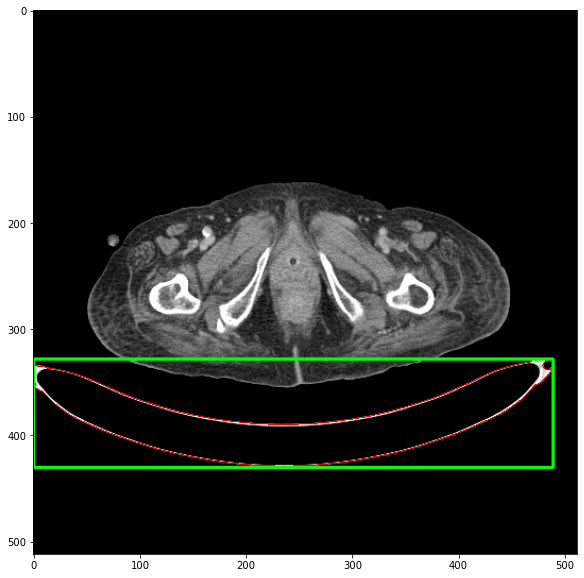

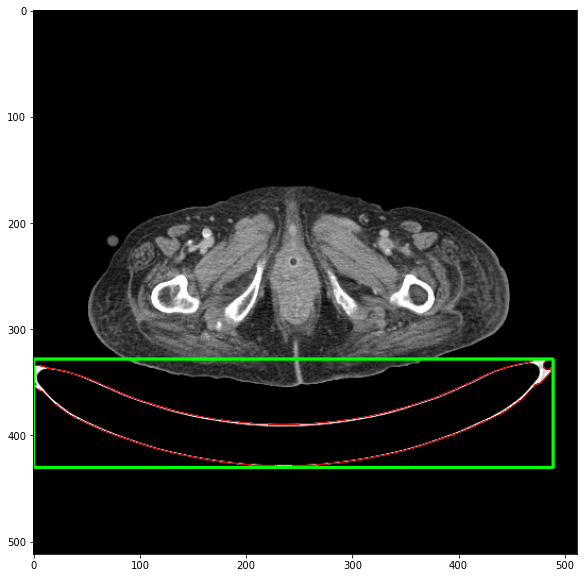

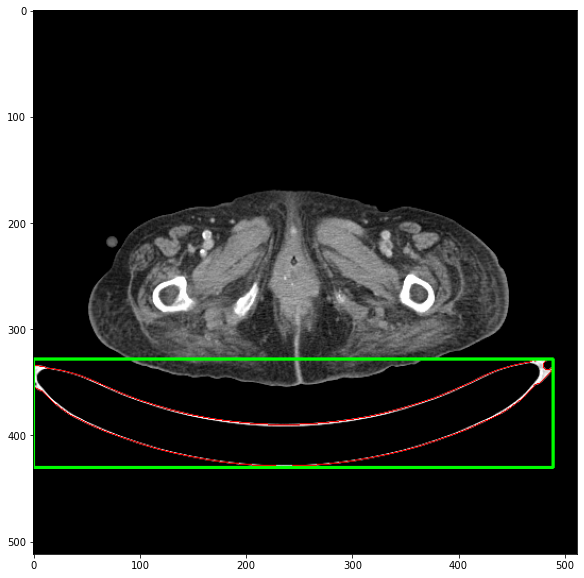

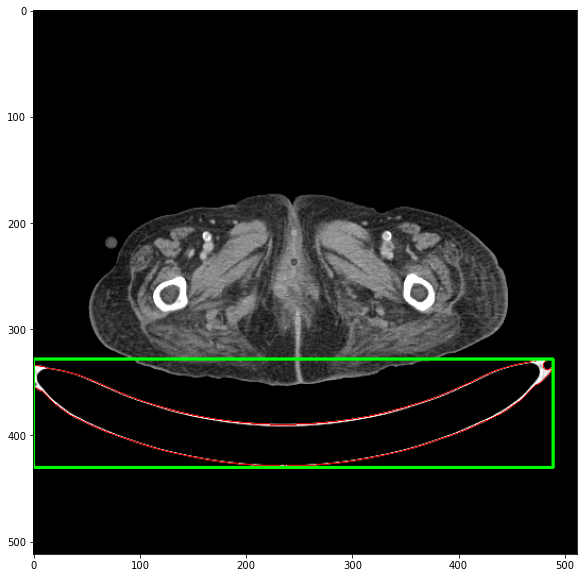

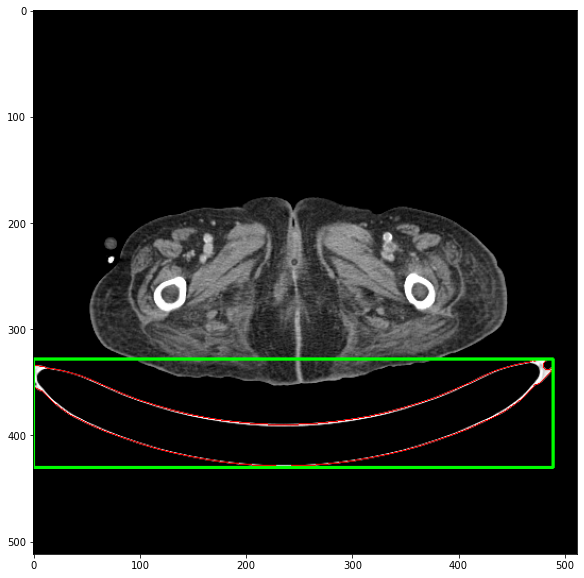

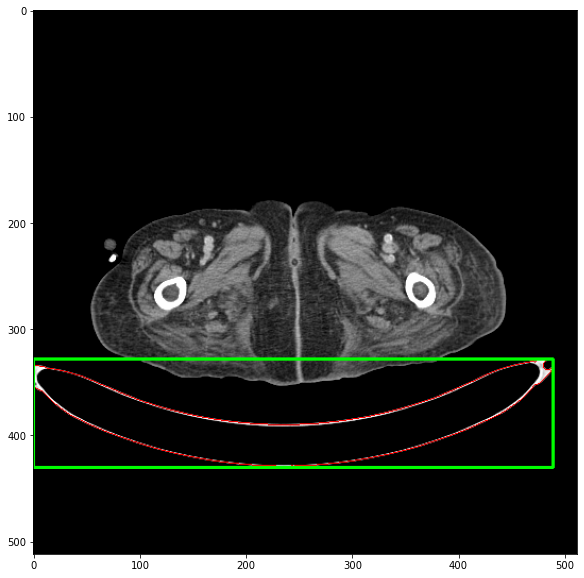

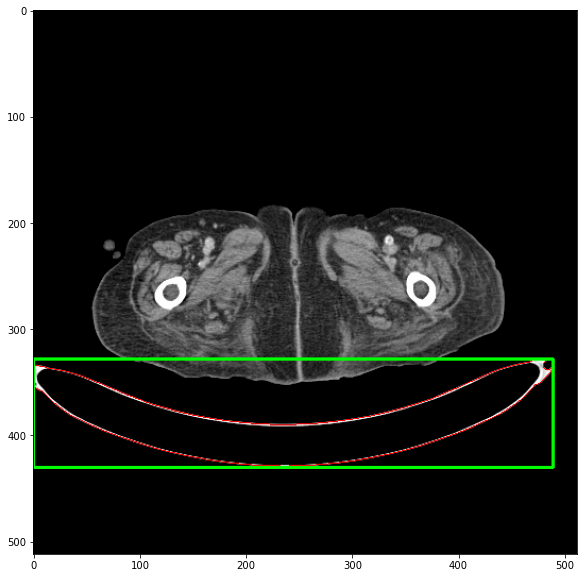

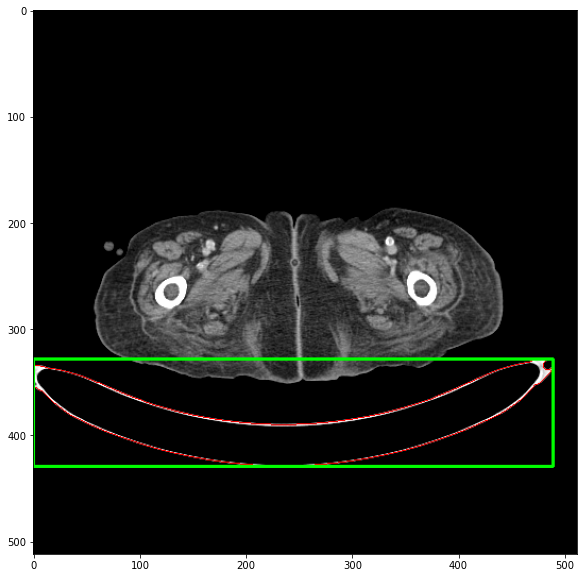

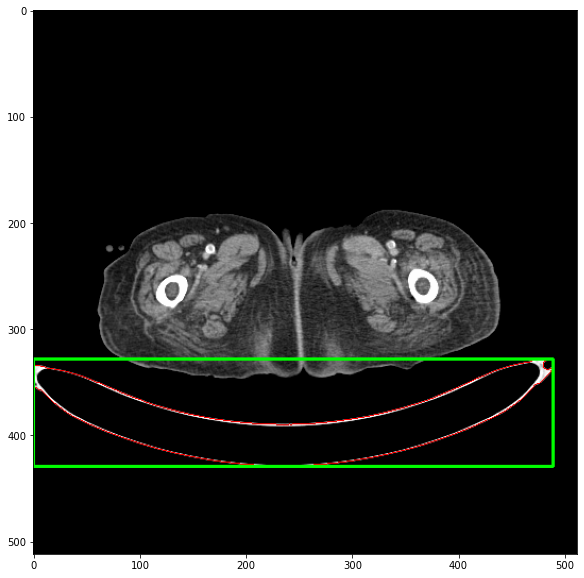

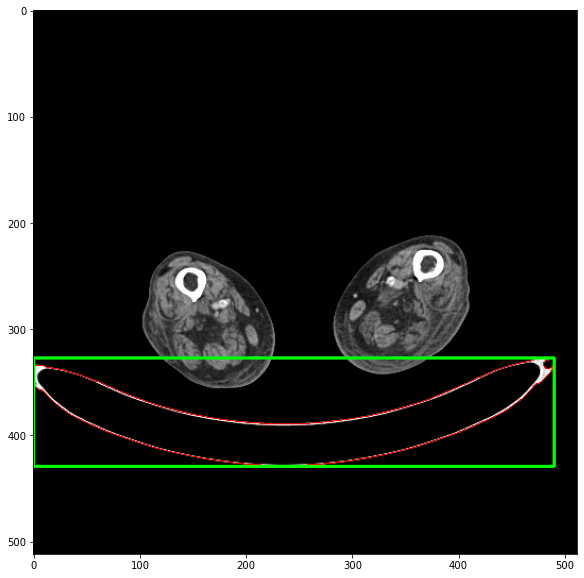

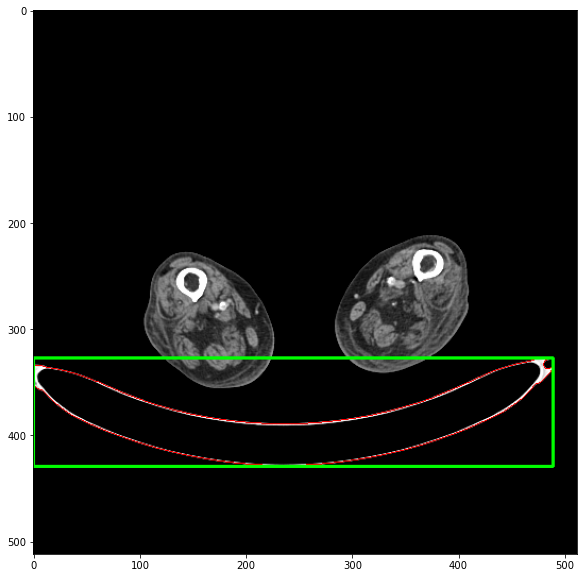

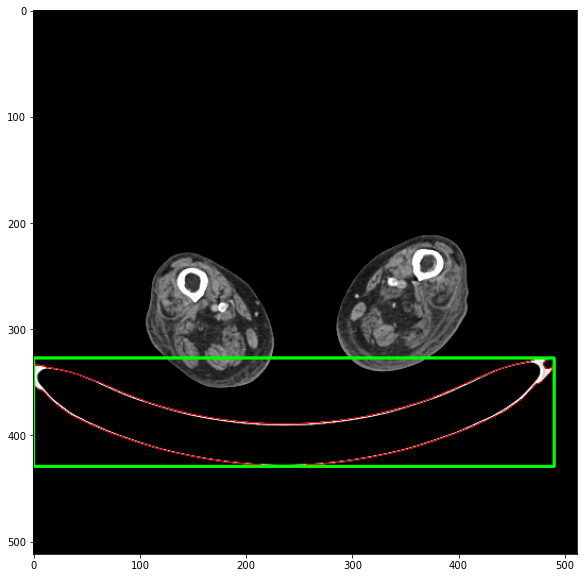

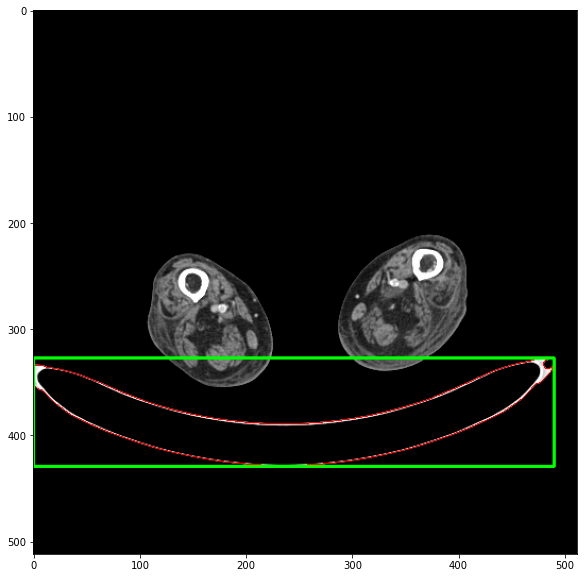

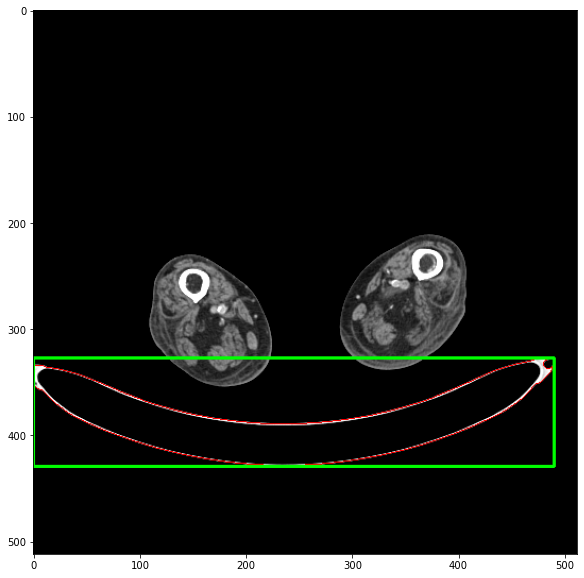

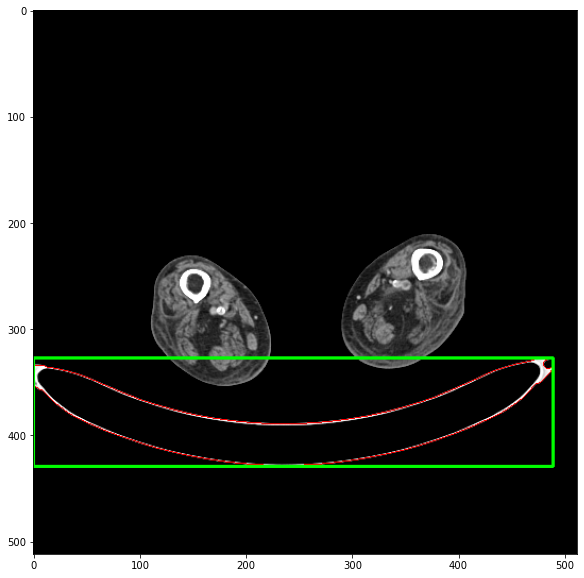

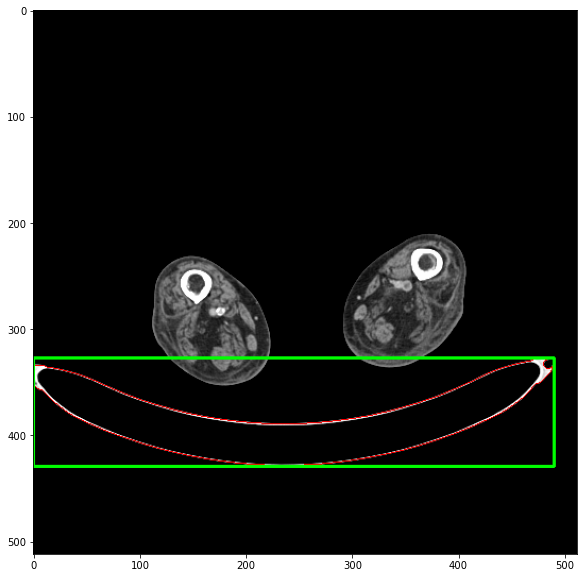

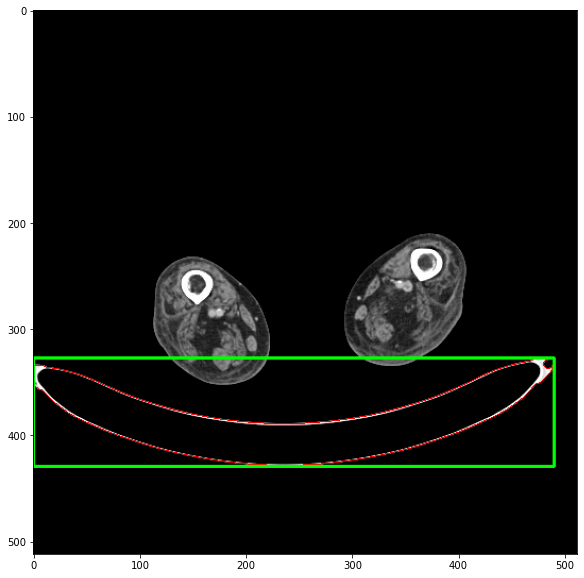

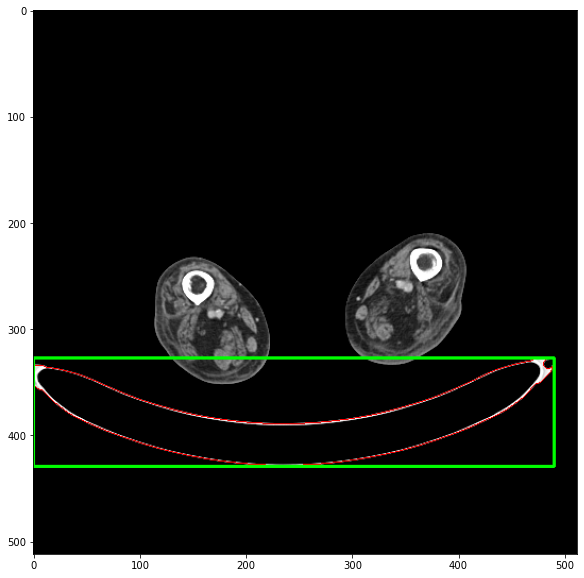

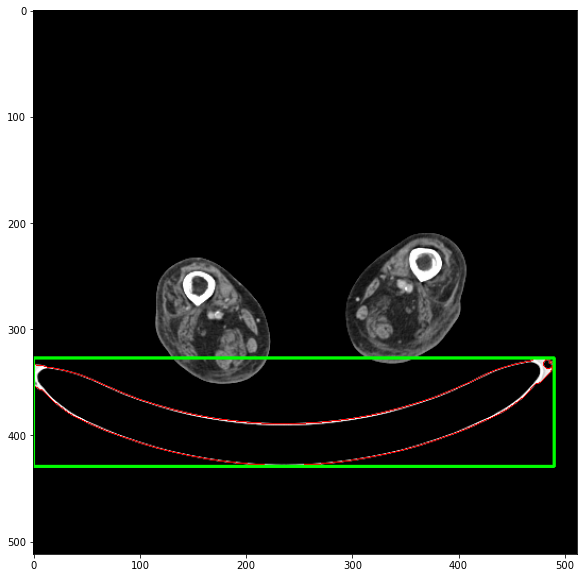

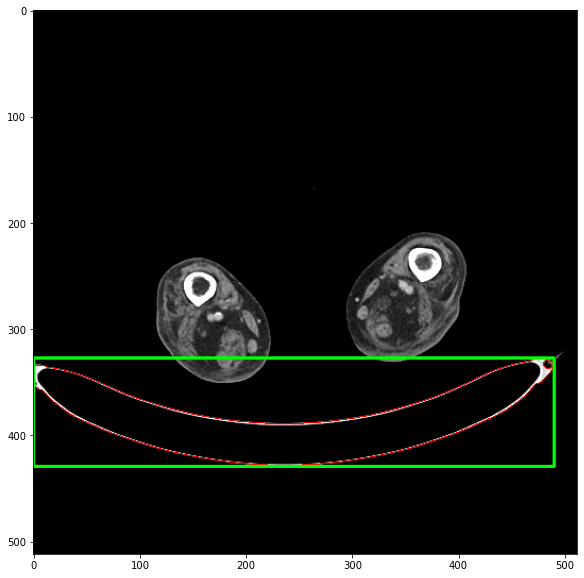

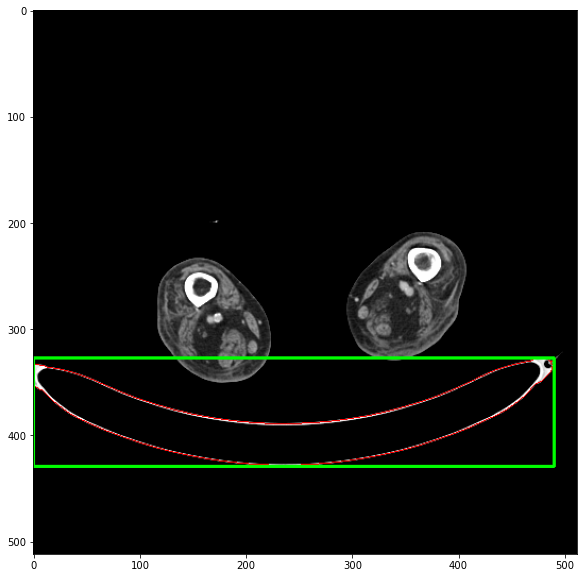

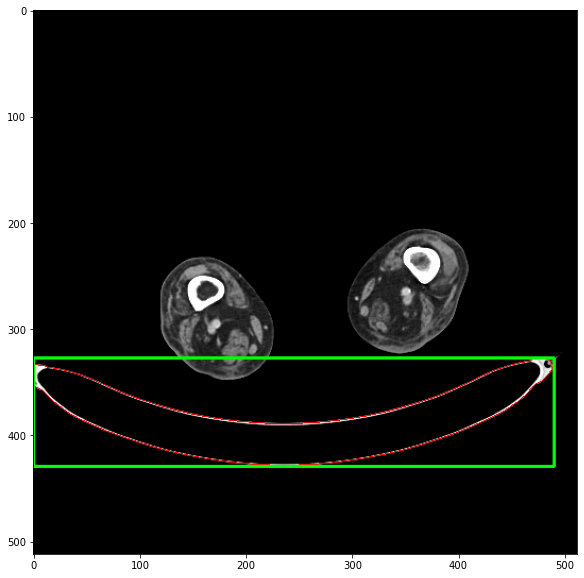

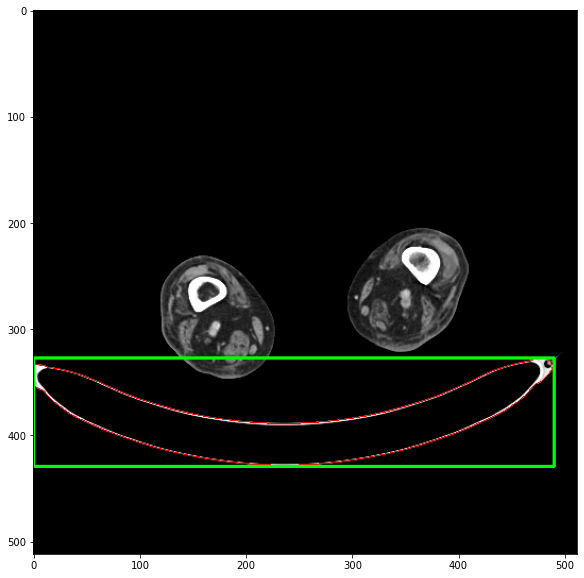

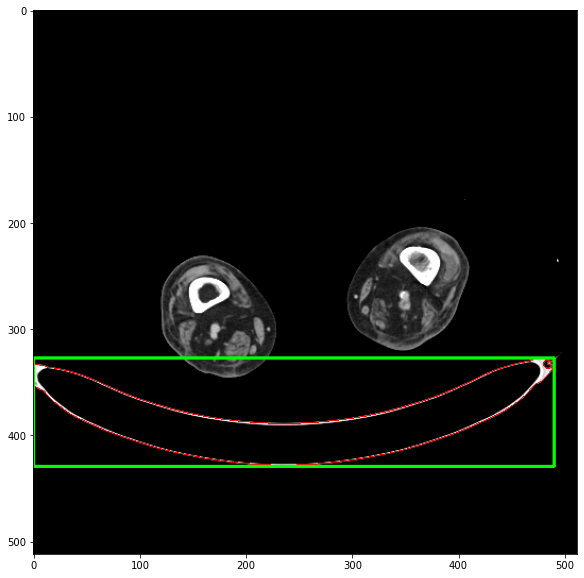

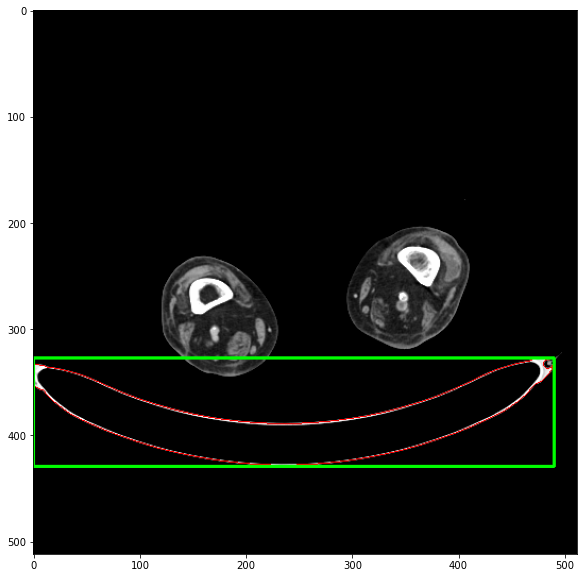

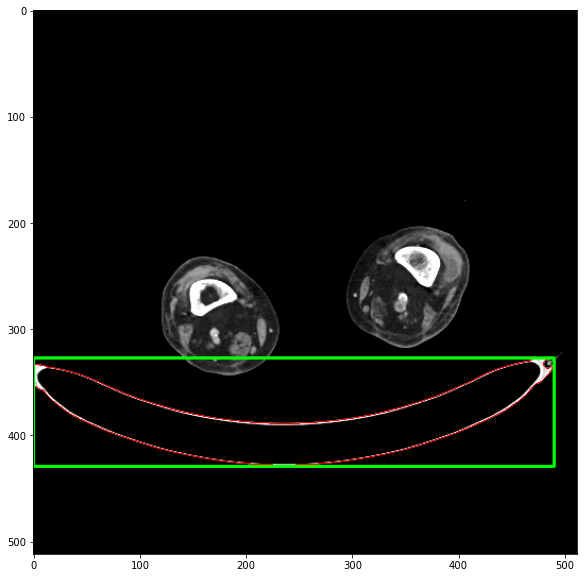

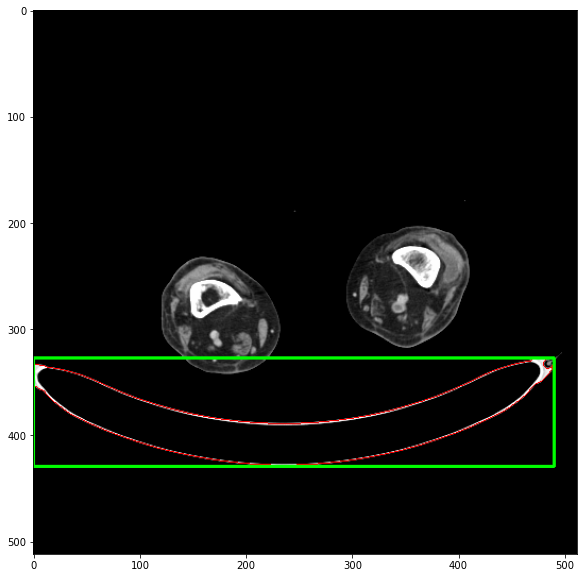

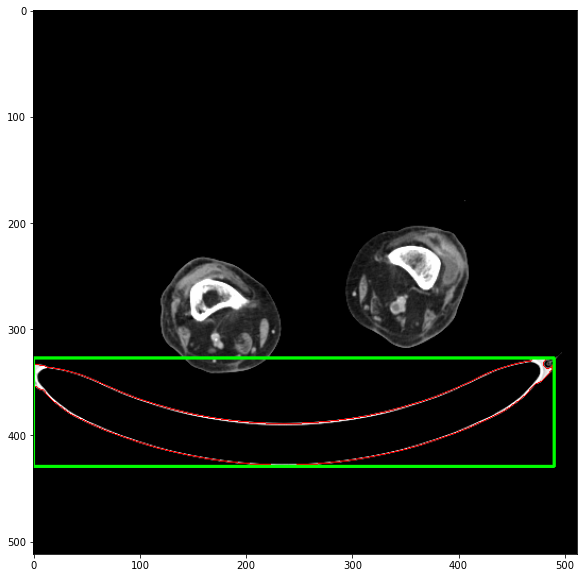

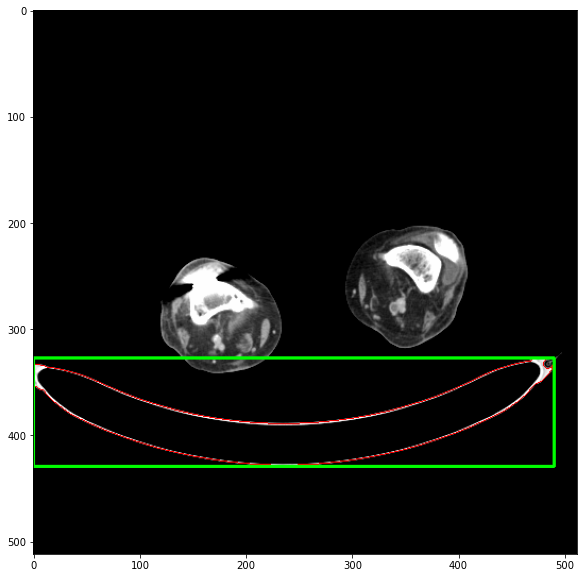

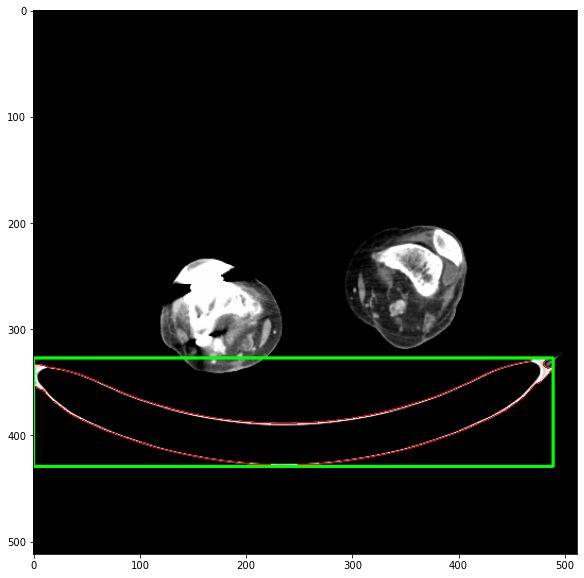

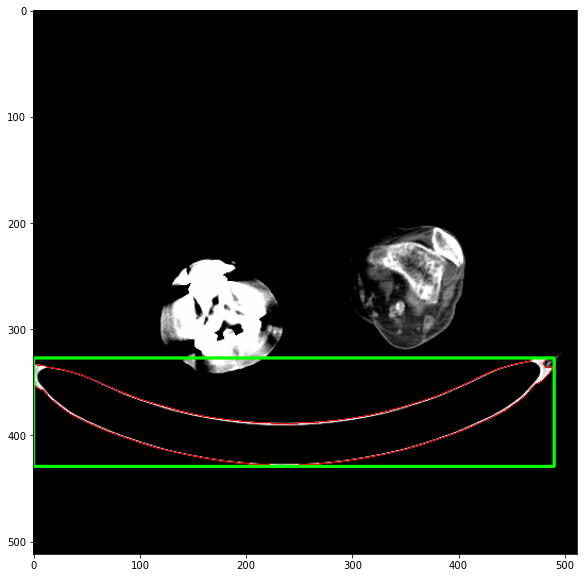

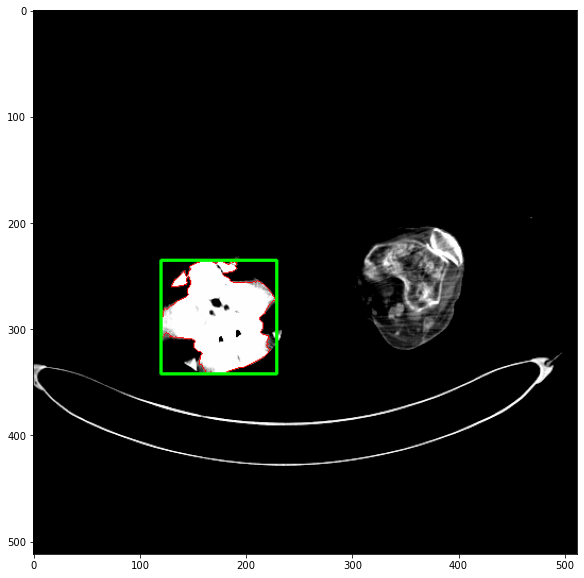

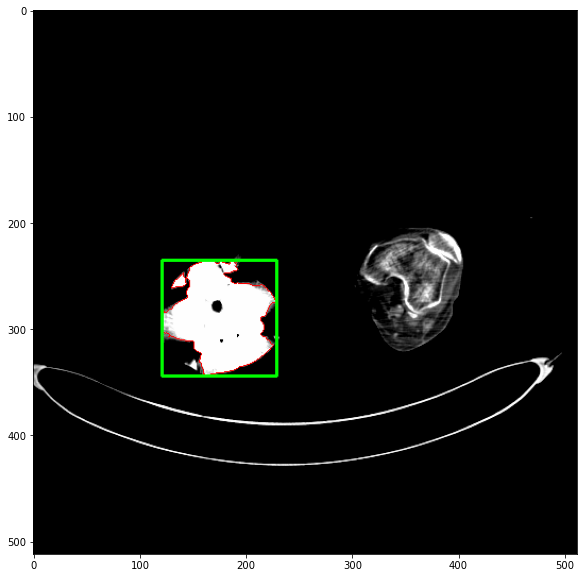

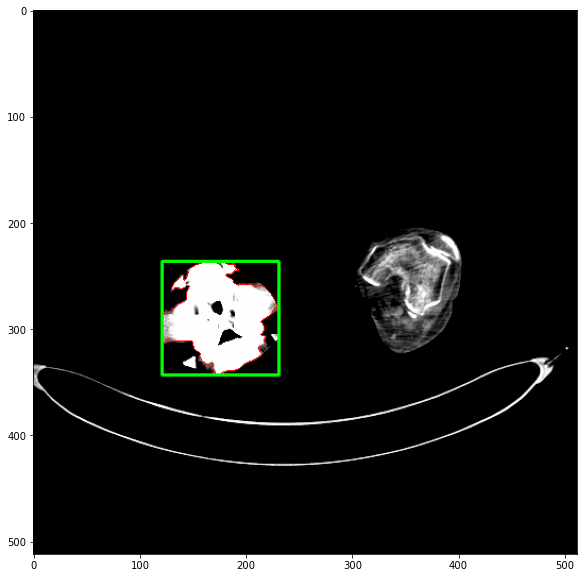

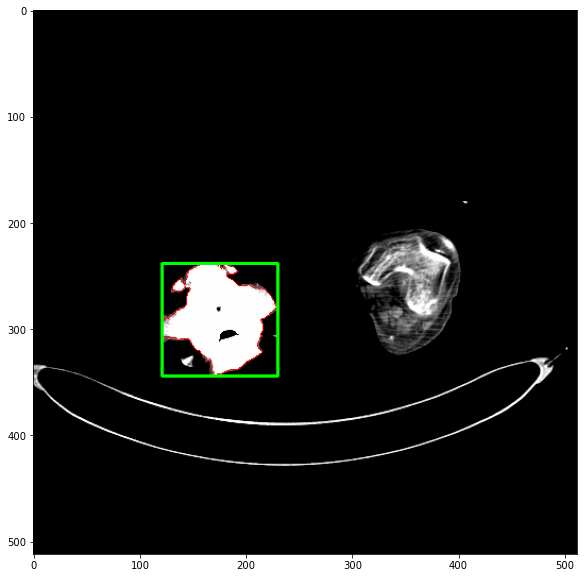

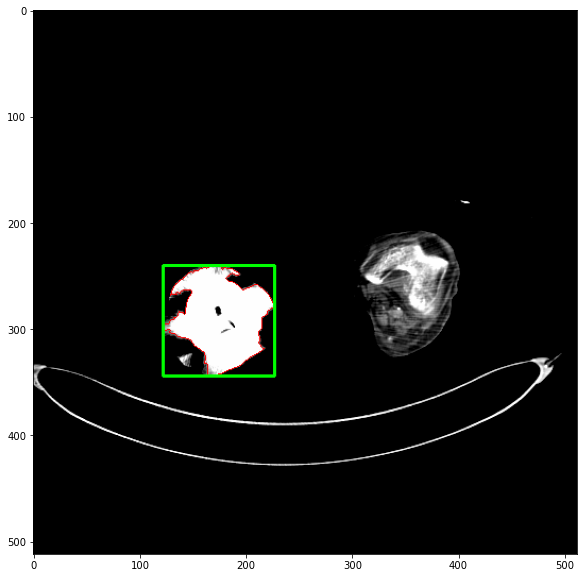

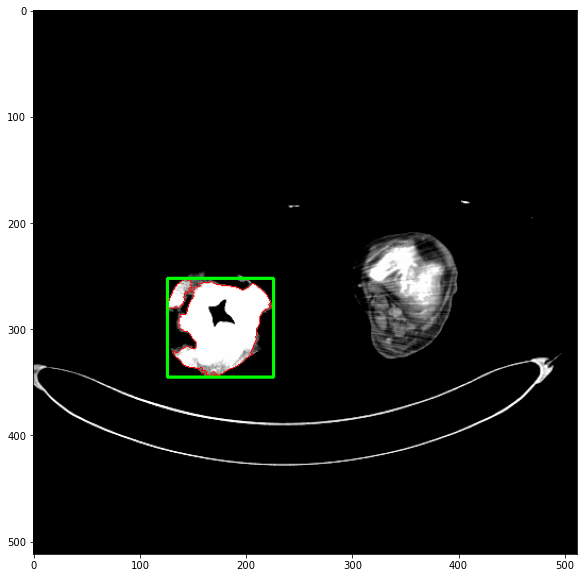

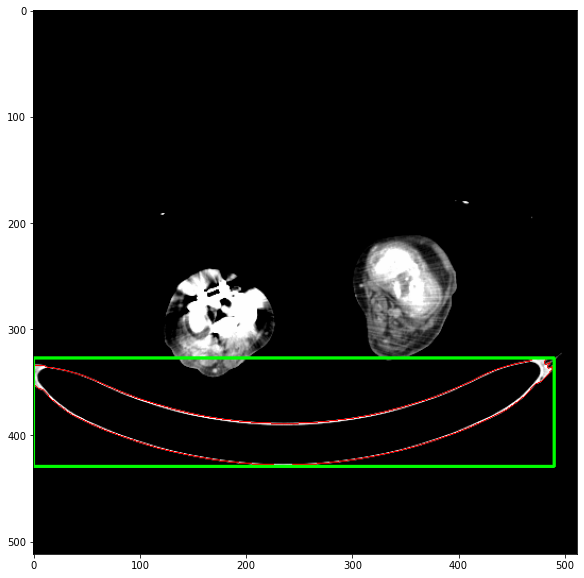

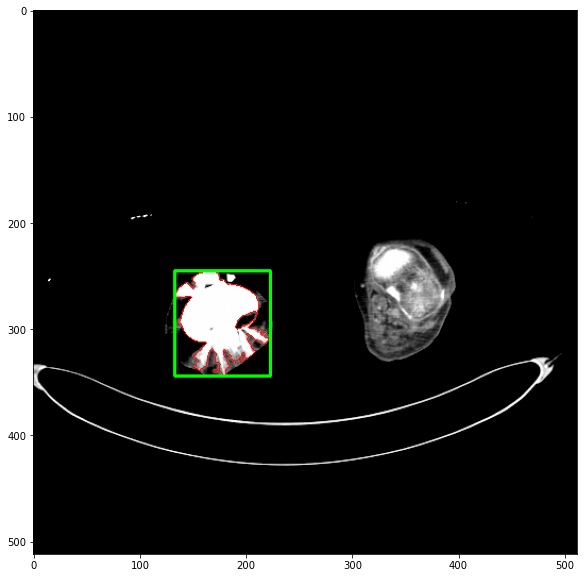

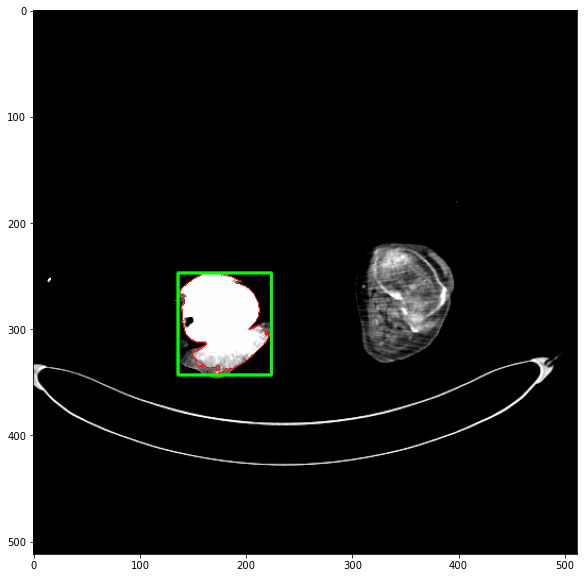

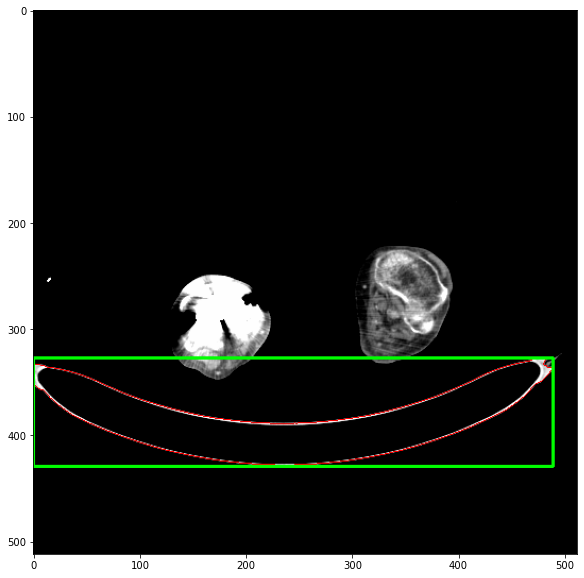

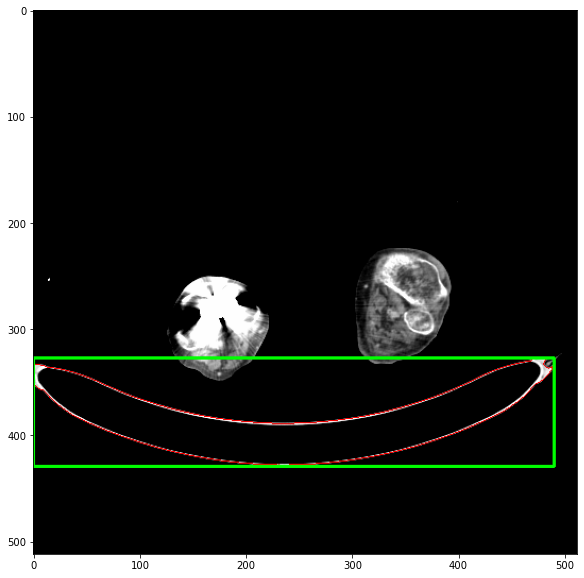

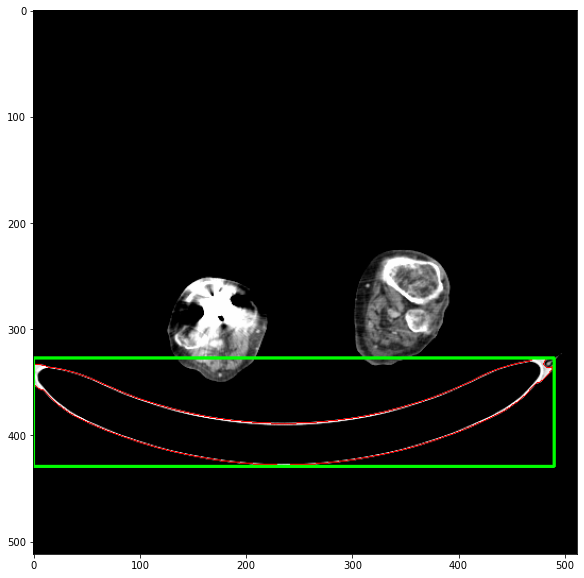

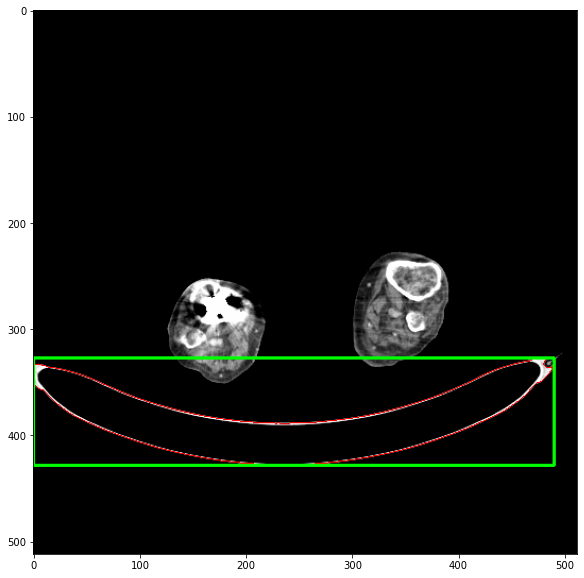

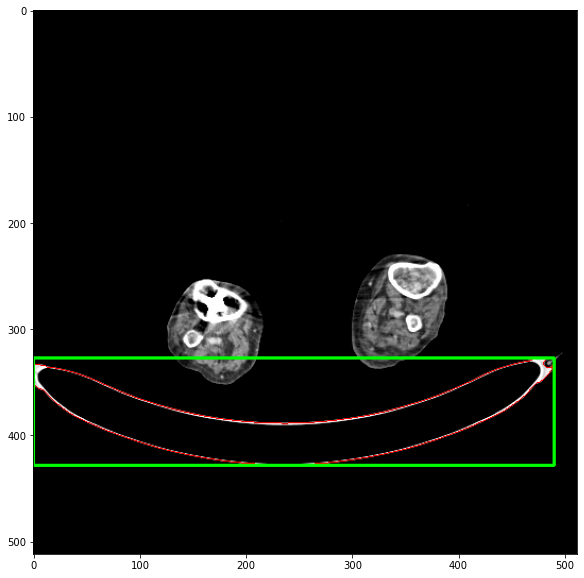

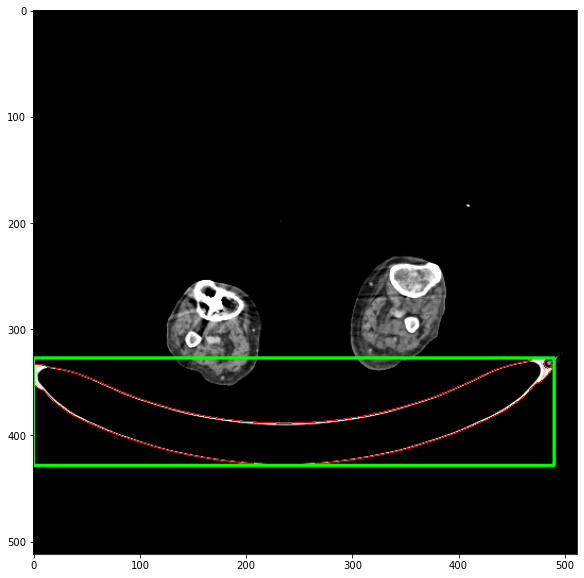

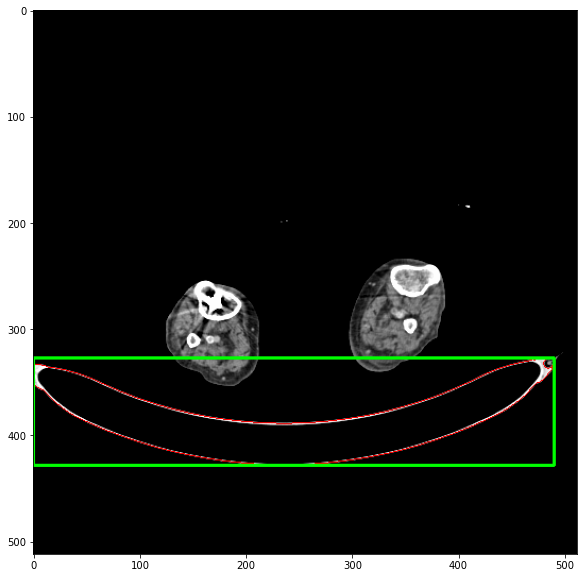

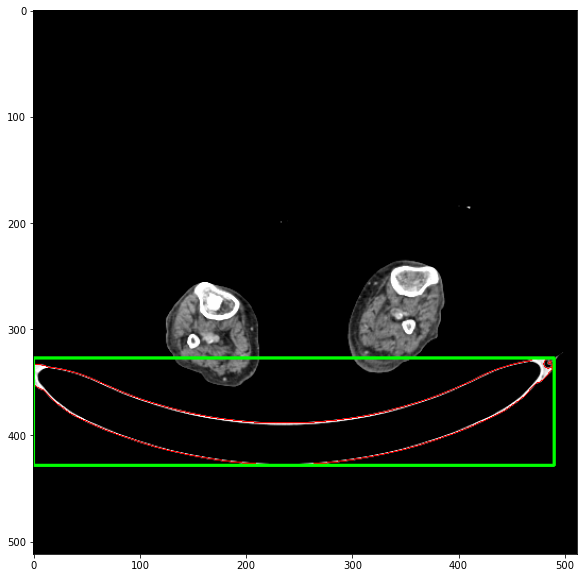

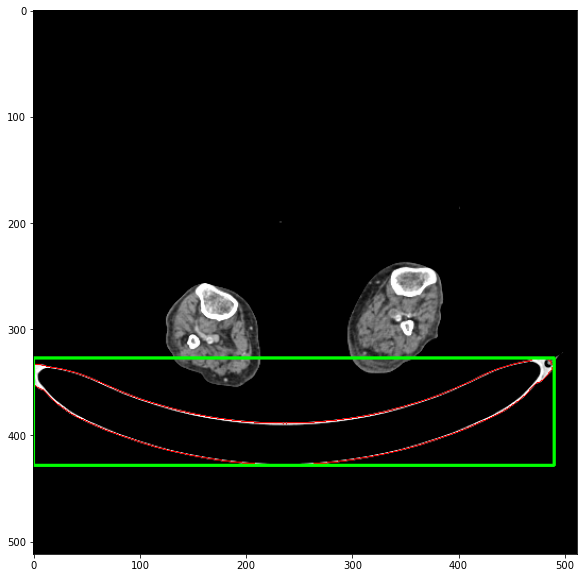

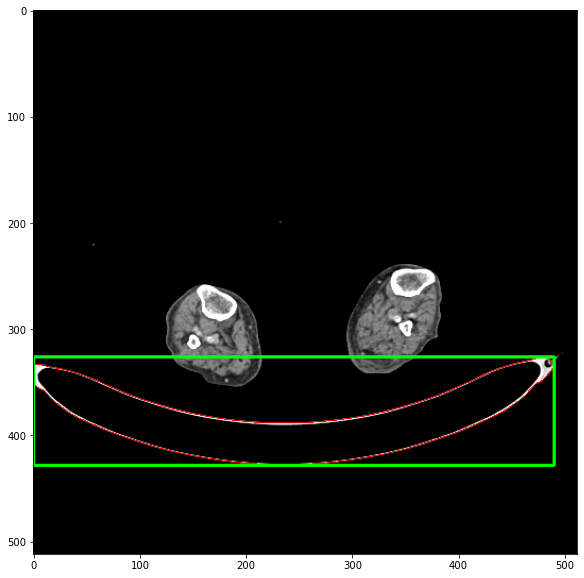

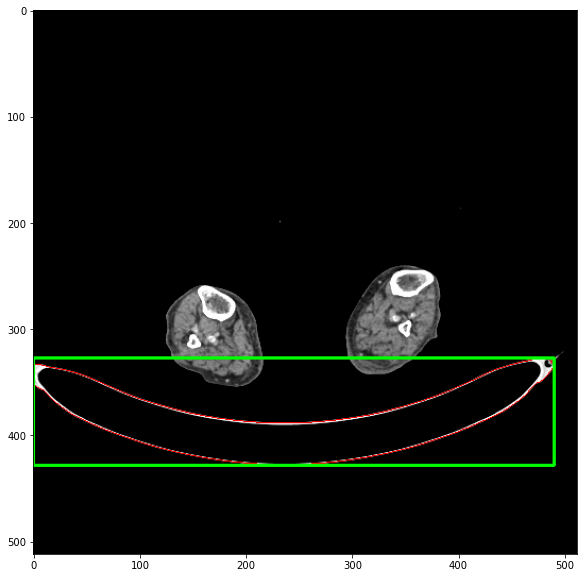

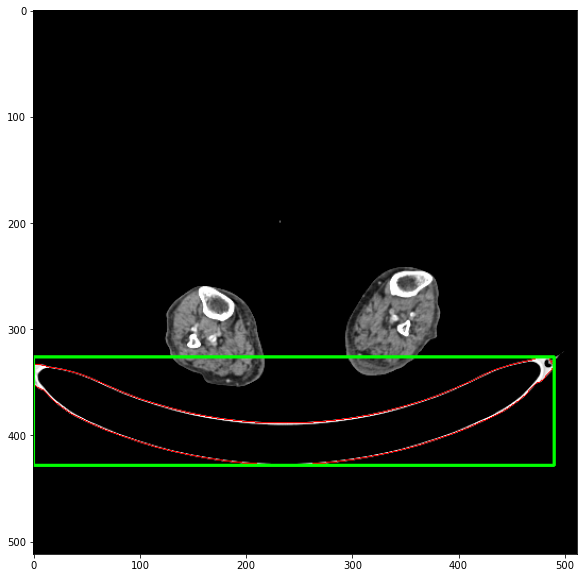

In [100]:
# for fl in range(len(fol_list)):
for fl in range(0,1):
    
    img_list=sorted(glob.glob(fol_list[fl]+'/*.png'))
    
    for il in range(len(img_list)):
   
        img = cv2.imread(img_list[il])

        gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = np.float32(gray1)
        img1 = img.copy()

        ret, thresh = cv2.threshold(gray1,127,255,0)

        contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

        nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(gray1)

        int_cent = centroids.astype(np.int32)

        img2=img.copy()
        areas=[]
        conloc=[]
        # for cal in range(len(labels)):
        for cnt in range(len(contours)):    
            area=cv2.contourArea(contours[cnt])
            areas.append(area)
            conloc.append(contours[cnt])
        body=areas.index(max(areas))

        cv2.drawContours(img2, [contours[body]], 0,(255,0,0), 1)

        leg=[[contours[body]]]

        x, y, w, h = cv2.boundingRect(contours[body])
        cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 2)

        plt.figure(figsize=(10,10))    
        plt.imshow(img2, cmap='gray')